In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit

# カーブフィッティング

## 回帰分析

Covid19の感染者数推移
- https://github.com/CSSEGISandData/COVID-19
- https://www.kaggle.com/code/wuhong60909/logistic-growth-model-2020-04-22/notebook#Minimized-loss-function:-scipy.optimize.minimize

In [1]:
df = pd.read_csv('./chap_3/time_series_covid19_confirmed_global.csv', header=0)

In [9]:
df = df.loc[df['Country/Region'] == 'Korea, South']
date = df.iloc[:, 4:].columns
num = df.iloc[:, 4:].values[0]

In [15]:
date = pd.to_datetime(date)
data = pd.DataFrame({'date': date, 'num': num})
data.to_csv('./chap_3/covid19_korea.csv', index=False)

In [19]:
data

,date,num
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1138,2023-03-05,30569215
1139,2023-03-06,30581499
1140,2023-03-07,30594297
1141,2023-03-08,30605187


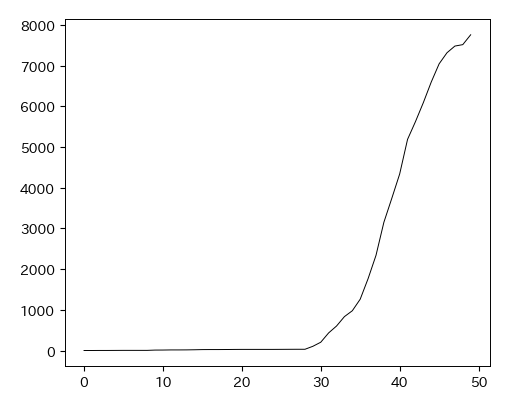

In [34]:
fig, ax = plt.subplots(figsize=(5, 4))
x, y = data.index[:50], data['num'][:50]
ax.plot(x, y, 'k', label='data')

In [35]:
def f_sigmoid(t, a, b, c):
    return a*(1+b*np.exp(-c*t))**(-1)

In [36]:
p_opt = curve_fit(f_sigmoid, x, y)[0]
print(p_opt)

[7.94804298e+03 1.23346612e+06 3.55899282e-01]


/Users/narizuka/.pyenv/versions/miniforge3-4.10.3-10/envs/myenv/lib/python3.9/site-packages/pandas/core/indexes/base.py:920: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


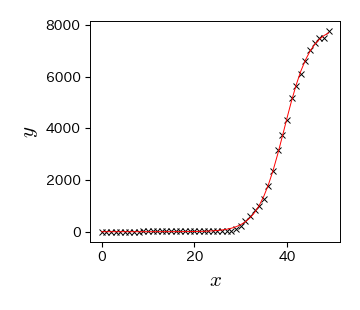

In [37]:
fig, ax = plt.subplots()
ax.plot(x, y, 'x')
ax.plot(x, f_sigmoid(x, p_opt[0], p_opt[1], p_opt[2]), 'r-', mfc='None')

ax.set_xlabel('$x$', fontsize=15); ax.set_ylabel('$y$', fontsize=15);

## 最尤推定

- http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2019a/content/lessons/lesson_08/numerical_mle.html
- https://www.kamishima.net/mlmpyja/lr/optimization.html
- https://qiita.com/Gyutan/items/97b7cb7d30772f2283a1
- https://datascience.stackexchange.com/questions/112563/using-scipy-minimize-to-find-the-maximum-likelihood-estimates-for-multivariate-g
- https://qiita.com/katsu1110/items/5792250de638e377ee14

ベルヌーイ分布

In [35]:
import numpy as np
from scipy.stats import bernoulli
import scipy as sp

# データの生成
# np.random.seed(seed=32)
x = bernoulli.rvs(p=0.1, size=100)

# 負の対数尤度を計算する関数
def neg_log_likelihood(p):
    return -np.sum(np.log(np.maximum(bernoulli.pmf(x, p), 1e-100))) # 0をlogに入れると-infになるのを防ぐためにnp.maximumを使う

# パラメータの初期値
x0 = 0.5

# パラメータの制約
constraints = [{'type': 'ineq', 'fun': lambda p: p - 1e-6}, # p > 0
               {'type': 'ineq', 'fun': lambda p: 1 - p - 1e-6}] # p < 1

# 負の対数尤度を最小化
result = sp.optimize.minimize(neg_log_likelihood, x0=x0, constraints=constraints)

print(result)


     fun: 19.85152473346694
     jac: array([0.04098678])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.05001947])


正規分布

In [41]:
import numpy as np
from scipy.stats import norm
import scipy as sp

# データの生成
# np.random.seed(seed=32)
x = np.random.normal(loc=100, scale=20, size=100)

# 負の対数尤度を計算する関数
def neg_log_likelihood(params):
    mu, sigma = params
    return -np.sum(np.log(np.maximum(norm.pdf(x, mu, sigma), 1e-100)))

# パラメータの初期値
x0 = np.array([100, 20])

# パラメータの制約
constraints = [{'type': 'ineq', 'fun': lambda params: params[1] - 1e-6}] # sigma > 0

# 負の対数尤度を最小化
result = sp.optimize.minimize(neg_log_likelihood, x0=x0, constraints=constraints)

print(result)

     fun: 445.228377611385
     jac: array([6.10351562e-05, 2.28881836e-05])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([100.39742674,  20.76663164])
